<a href="https://colab.research.google.com/github/d4rk3dge/iitm_hackathon/blob/main/MUFIN_Green_Finance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import yfinance as yf
import pandas as pd
import os
import numpy as np

In [ ]:
ticker = "MUFIN.NS"  #green finance dataset
start_date = "2020-01-01"
end_date ="2024-01-03"

data  = yf.download(ticker,start=start_date, end=end_date)
print(data)

[*********************100%%**********************]  1 of 1 completed
                  Open        High         Low       Close   Adj Close  Volume
Date                                                                          
2023-11-06  133.000000  135.649994  128.000000  134.500000  134.500000  209080
2023-11-07  135.649994  135.649994  127.800003  127.800003  127.800003  210215
2023-11-08  124.000000  130.000000  121.449997  125.000000  125.000000  370078
2023-11-09  127.650002  127.699997  119.050003  122.000000  122.000000   84168
2023-11-10  125.900002  125.900002  119.750000  120.849998  120.849998  109387
2023-11-13  125.000000  126.000000  121.150002  123.250000  123.250000   51344
2023-11-15  123.000000  126.949997  123.000000  124.849998  124.849998   82807
2023-11-16  126.000000  126.000000  121.599998  122.199997  122.199997   84406
2023-11-17  124.650002  124.650002  116.099998  116.699997  116.699997  218952
2023-11-20  116.699997  118.199997  110.900002  114.750000  11

In [ ]:
df = pd.DataFrame(data)
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-11-06,133.000000,135.649994,128.000000,134.500000,134.500000,209080
2023-11-07,135.649994,135.649994,127.800003,127.800003,127.800003,210215
2023-11-08,124.000000,130.000000,121.449997,125.000000,125.000000,370078
2023-11-09,127.650002,127.699997,119.050003,122.000000,122.000000,84168
2023-11-10,125.900002,125.900002,119.750000,120.849998,120.849998,109387


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 39 entries, 2023-11-06 to 2024-01-02
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       39 non-null     float64
 1   High       39 non-null     float64
 2   Low        39 non-null     float64
 3   Close      39 non-null     float64
 4   Adj Close  39 non-null     float64
 5   Volume     39 non-null     int64  
dtypes: float64(5), int64(1)
memory usage: 2.1 KB


In [ ]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000
mean,135.096154,137.219230,130.961538,133.658974,133.658974,206098.923077
std,22.657312,23.602043,21.894830,23.087440,23.087440,221838.372864
min,109.000000,113.800003,108.050003,109.349998,109.349998,28192.000000
25%,116.824997,118.974998,112.525002,114.775002,114.775002,56780.500000
50%,125.900002,126.500000,121.449997,123.250000,123.250000,92418.000000
75%,155.025002,157.474998,147.650002,157.474998,157.474998,247990.000000
max,184.000000,185.500000,175.250000,180.350006,180.350006,881952.000000


In [ ]:
df['date'] = pd.to_datetime(df.index)
df.head()

,Open,High,Low,Close,Adj Close,Volume,date
Date,,,,,,,
2023-11-06,133.000000,135.649994,128.000000,134.500000,134.500000,209080,2023-11-06
2023-11-07,135.649994,135.649994,127.800003,127.800003,127.800003,210215,2023-11-07
2023-11-08,124.000000,130.000000,121.449997,125.000000,125.000000,370078,2023-11-08
2023-11-09,127.650002,127.699997,119.050003,122.000000,122.000000,84168,2023-11-09
2023-11-10,125.900002,125.900002,119.750000,120.849998,120.849998,109387,2023-11-10


In [ ]:
import plotly.graph_objects as go

fig = go.Figure(data=[go.Candlestick(x=df['date'],
                open = df['Open'],
                high = df['High'],
                low = df['Low'],
                close = df['Close'])] )

fig.update_layout(
    title = "Green Finance Chart MUFIN.NS",
    yaxis_title = "Price ($)",
    xaxis_rangeslider_visible= False)

fig.show()

In [ ]:
df.drop(['date','Volume'],axis=1, inplace=True)

In [ ]:
df.reset_index(drop=True, inplace=True)

<Axes: >

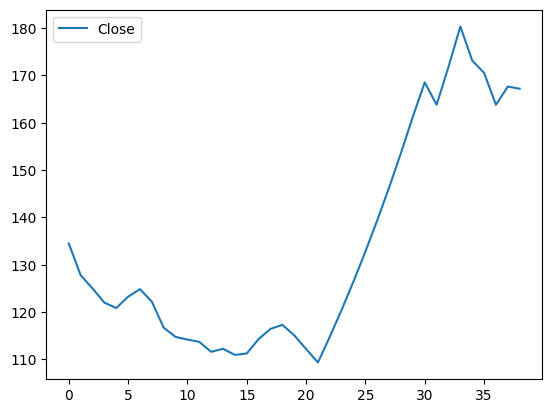

In [ ]:
df.plot.line(y="Close",use_index=True)

In [ ]:
df.reset_index(drop=True, inplace=True)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score

In [ ]:
x = df[['Open','Close','High','Low','Adj Close']]
y = df['Close']
x_train,x_test, y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

rfr = RandomForestRegressor()
rfr.fit(x_train,y_train)
y_pred = rfr.predict(x_test)

mse = mean_squared_error(y_test,y_pred)
r2 = r2_score(y_test,y_pred)
print(f'mse:{mse} r2:{r2}')

mse:9.90908130662003 r2:0.9813521569855036


In [ ]:
y_pred

array([172.36199677, 164.5670015 , 121.70549927, 111.53499794,
       166.49999786, 136.55400009, 124.22249985, 147.31799606])

In [ ]:
diff = pd.DataFrame(np.c_[y_test,y_pred],columns=['Actual','Predicted'])
diff

,Actual,Predicted
0,180.350006,172.361997
1,163.800003,164.567001
2,120.849998,121.705499
3,112.250000,111.534998
4,168.550003,166.499998
5,139.399994,136.554000
6,124.849998,124.222500
7,146.350006,147.317996


In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score

In [ ]:
x = df[['Open','Close','High','Low','Adj Close']]
y = df['Close']
x_train,x_test, y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

dt = DecisionTreeRegressor()
dt.fit(x_train,y_train)
y_pred = dt.predict(x_test)

mse = mean_squared_error(y_test,y_pred)
r2 = r2_score(y_test,y_pred)
print(f'mse:{mse} r2:{r2}')

In [ ]:
diff = pd.DataFrame(np.c_[y_test,y_pred],columns=['Actual','Predicted'])
diff